# Assignment - Part II

### Imports and global settings

In [1]:
import os
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import time
plt.style.use('seaborn-whitegrid')
import matplotlib.pyplot as plt

## Approximation of Mackey Glass time series function

In [2]:
def data_split(training_size, inputs, targets):
    inputs_training = inputs[0:training_size, :]
    targets_training = targets[0:training_size, :]
    inputs_testing = inputs[training_size:1000, :]
    targets_testing = targets[training_size:1000,:]
    inputs_evaluation = inputs[1000:1200, :]
    targets_evaluation = targets[1000:1200, :]
    print("\n Training samples: " + str(inputs_training.shape[0] ), 
            "\n Testing samples: " + str(inputs_testing.shape[0]), 
            "\n Evaluation samples: " + str(inputs_evaluation.shape[0]))

    return inputs_training, targets_training, \
        inputs_testing, targets_testing, \
        inputs_evaluation, targets_evaluation

In [3]:
def Euler_Approximation(t, beta, gamma, tau, n):
    x = np.zeros(t)
    x[0] = 1.5
    for time in range(t-1):
        if time-tau < 0:
            x[time+1] = 0
        else:
            x[time+1] = x[time]+((beta*x[time-tau])/(1+(x[time-tau]**n)))-gamma*x[time]
    return x

## Data generation

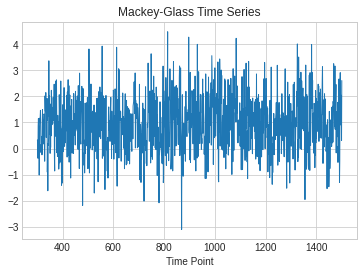

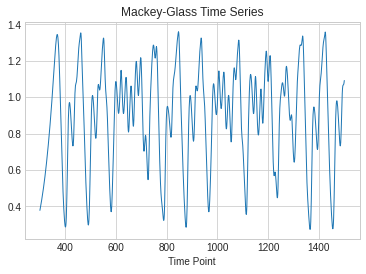

In [4]:
def generate_data(Noise):
    """ Generate Mackey-Glass time series.

    Parameters 
    ----------
    Noise : Boolean
        A boolean that determines if gaussian noise should be added to the targets

    Returns
    -----------
    inputs : array
        Returns the inputs that can later be split and used for training
    target : array
        Returns the targets that can later be split and used for training

    """
    inputs = np.zeros((time_to-time_from, 5))
    targets = np.zeros((time_to-time_from, 1))
    f = Euler_Approximation(time_to + 5, beta, gamma, tau, n)
    
    if Noise == True:
        for time in range(time_from, time_to):
            inputs[time-time_from][0] = f[time-20]  
            inputs[time-time_from][1] = f[time-15]  
            inputs[time-time_from][2] = f[time-10]
            inputs[time-time_from][3] = f[time-5]
            inputs[time-time_from][4] = f[time]
            targets[time-time_from] = f[time+5] + np.random.normal(loc=0.05, scale=1)

    else:
        for time in range(time_from, time_to):
            inputs[time-time_from][0] = f[time-20]  
            inputs[time-time_from][1] = f[time-15]  
            inputs[time-time_from][2] = f[time-10]
            inputs[time-time_from][3] = f[time-5]
            inputs[time-time_from][4] = f[time]
            targets[time-time_from] = f[time+5] 

    plt.plot( range(time_from, time_to), targets, linewidth=1.0)
    plt.xlabel("Time Point")
    plt.title("Mackey-Glass Time Series")
    plt.show()
    return inputs, targets

beta = 0.2
gamma = 0.1
n = 10
tau = 25
time_from = 301
time_to = 1501
t = time_to - time_from

x = Euler_Approximation(t, beta, gamma,tau,n)
inputs_noisy, targets_noisy = generate_data(Noise = True) 
inputs, targets = generate_data(Noise = False)

More chaos in the time series with Noise = True.

In [5]:
print(inputs.shape)
print(targets.shape)

(1200, 5)
(1200, 1)


In [6]:
def show_curves(history):
    # train_loss = history.history["loss"]
    # val_loss = history.history["val_loss"]
    # loss is MSE so loss and MSE are the same
    mean_squared_error = history.history["mean_squared_error"]
    val_mean_squared_error = history.history["val_mean_squared_error"]
    
    plt.plot(mean_squared_error, color="b", label="MSE train")
    plt.plot(val_mean_squared_error, color="r", label="MSE val")
    plt.title("MSE vs epochs")
    plt.legend(loc="upper right")
    plt.xlabel("Number of epochs")
    plt.ylabel("MSE")
    plt.show()

In [7]:
def get_uncomplied_model(input_dim, hidden_layer_1_dim, hidden_layer_2_dim):
    # Input layer dim
    input_shape = (input_dim,)
    # Create model using Sequential
    model = Sequential()
    output_dim = 1
    l2 = 10e-8
    model.add(Dense(hidden_layer_1_dim, 
                    input_shape=input_shape, 
                    activation='sigmoid',
                    kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=1),
                    bias_regularizer=tf.keras.regularizers.l2(l2=l2),
                    kernel_regularizer=tf.keras.regularizers.l2(l2=l2)))
    
    model.add(Dense(hidden_layer_2_dim, 
                    activation='sigmoid',
                    kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=1),
                    bias_regularizer=tf.keras.regularizers.l2(l2=l2),
                    kernel_regularizer=tf.keras.regularizers.l2(l2=l2)))
    
    model.add(Dense(output_dim, 
                    activation='linear',
                    kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=1),
                    bias_regularizer=tf.keras.regularizers.l2(l2=l2),
                    kernel_regularizer=tf.keras.regularizers.l2(l2=l2)))
    
    return model

def get_compiled_model(model, learning_rate):
    # Configure the model and start training
    # val_loss is almost mse_val, except the weight decay term, same with train
    optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, 
                                        momentum=0.9, 
                                        nesterov=True, 
                                        name="SGD")
    
    model.compile(loss="mse", optimizer=optimizer, metrics=['mean_squared_error'])
    
    return model

No noise

In [8]:
"""inputs_training, targets_training, \
    inputs_testing, targets_testing, \
    inputs_evaluation, targets_evaluation = data_split(training_size=700, inputs=inputs, targets=targets)

input_dim = inputs_training.shape[1]
hidden_layer_1_dim = 8
hidden_layer_2_dim = 8
learning_rate = 10e-3
batch_size = 100
epochs = 10000

print(inputs_training.shape)"""

'inputs_training, targets_training,     inputs_testing, targets_testing,     inputs_evaluation, targets_evaluation = data_split(training_size=700, inputs=inputs, targets=targets)\n\ninput_dim = inputs_training.shape[1]\nhidden_layer_1_dim = 8\nhidden_layer_2_dim = 8\nlearning_rate = 10e-3\nbatch_size = 100\nepochs = 10000\n\nprint(inputs_training.shape)'

In [9]:
inputs_training, targets_training, \
    inputs_testing, targets_testing, \
    inputs_evaluation, targets_evaluation = data_split(training_size=700, inputs=inputs, targets=targets)

input_dim = inputs_training.shape[1]
hidden_layer_1_dim = 5
hidden_layer_2_dim = 6
learning_rate = 10e-3
batch_size = 100
epochs = 10000

print(inputs_training.shape)


 Training samples: 700 
 Testing samples: 300 
 Evaluation samples: 200
(700, 5)


In [10]:
uncompiled_model = get_uncomplied_model(input_dim, hidden_layer_1_dim, hidden_layer_2_dim)
model = get_compiled_model(uncompiled_model, learning_rate)

model_saver = ModelCheckpoint(os.path.join("saved_models", "save_at_{epoch}.h5"), period=100)
early_stopper = tf.keras.callbacks.EarlyStopping(monitor='val_mean_squared_error', 
                                                 min_delta=10e-5, 
                                                 restore_best_weights=True, 
                                                 patience=100)
callbacks = [model_saver, early_stopper]

history = model.fit(inputs_training, targets_training,
                    epochs=epochs, 
                    batch_size=batch_size, 
                    verbose=1, 
                    validation_data=(inputs_testing, targets_testing), 
                    shuffle=False,
                    callbacks=callbacks)

Epoch 1/10000
7/7 [==============================] - 1s 69ms/step - loss: 2.1143 - mean_squared_error: 2.1143 - val_loss: 0.3471 - val_mean_squared_error: 0.3471
Epoch 2/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.4175 - mean_squared_error: 0.4175 - val_loss: 0.2062 - val_mean_squared_error: 0.2062
Epoch 3/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.1285 - mean_squared_error: 0.1285 - val_loss: 0.0645 - val_mean_squared_error: 0.0645
Epoch 4/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.1717 - mean_squared_error: 0.1717 - val_loss: 0.0427 - val_mean_squared_error: 0.0426
Epoch 5/10000
7/7 [==============================] - 0s 8ms/step - loss: 0.1120 - mean_squared_error: 0.1120 - val_loss: 0.0590 - val_mean_squared_error: 0.0590
Epoch 6/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0986 - mean_squared_error: 0.0986 - val_loss: 0.0394 - val_mean_squared_error: 0.0394
Epoch 7/10000
7/7 [==============

Epoch 51/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0407 - mean_squared_error: 0.0407 - val_loss: 0.0165 - val_mean_squared_error: 0.0165
Epoch 52/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0404 - mean_squared_error: 0.0404 - val_loss: 0.0164 - val_mean_squared_error: 0.0164
Epoch 53/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0401 - mean_squared_error: 0.0401 - val_loss: 0.0163 - val_mean_squared_error: 0.0163
Epoch 54/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0399 - mean_squared_error: 0.0399 - val_loss: 0.0162 - val_mean_squared_error: 0.0162
Epoch 55/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0396 - mean_squared_error: 0.0396 - val_loss: 0.0161 - val_mean_squared_error: 0.0161
Epoch 56/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0394 - mean_squared_error: 0.0394 - val_loss: 0.0161 - val_mean_squared_error: 0.0161
Epoch 57/10000
7/7 [========

7/7 [==============================] - 0s 7ms/step - loss: 0.0333 - mean_squared_error: 0.0333 - val_loss: 0.0141 - val_mean_squared_error: 0.0141
Epoch 102/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0332 - mean_squared_error: 0.0332 - val_loss: 0.0140 - val_mean_squared_error: 0.0140
Epoch 103/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0331 - mean_squared_error: 0.0331 - val_loss: 0.0140 - val_mean_squared_error: 0.0140
Epoch 104/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0331 - mean_squared_error: 0.0331 - val_loss: 0.0140 - val_mean_squared_error: 0.0140
Epoch 105/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0330 - mean_squared_error: 0.0330 - val_loss: 0.0139 - val_mean_squared_error: 0.0139
Epoch 106/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0329 - mean_squared_error: 0.0329 - val_loss: 0.0139 - val_mean_squared_error: 0.0139
Epoch 107/10000
7/7 [=================

7/7 [==============================] - 0s 7ms/step - loss: 0.0294 - mean_squared_error: 0.0294 - val_loss: 0.0126 - val_mean_squared_error: 0.0126
Epoch 152/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0294 - mean_squared_error: 0.0294 - val_loss: 0.0126 - val_mean_squared_error: 0.0126
Epoch 153/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0293 - mean_squared_error: 0.0293 - val_loss: 0.0125 - val_mean_squared_error: 0.0125
Epoch 154/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0292 - mean_squared_error: 0.0292 - val_loss: 0.0125 - val_mean_squared_error: 0.0125
Epoch 155/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0291 - mean_squared_error: 0.0291 - val_loss: 0.0125 - val_mean_squared_error: 0.0125
Epoch 156/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0291 - mean_squared_error: 0.0291 - val_loss: 0.0125 - val_mean_squared_error: 0.0124
Epoch 157/10000
7/7 [=================

7/7 [==============================] - 0s 7ms/step - loss: 0.0258 - mean_squared_error: 0.0257 - val_loss: 0.0113 - val_mean_squared_error: 0.0113
Epoch 202/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0257 - mean_squared_error: 0.0257 - val_loss: 0.0113 - val_mean_squared_error: 0.0113
Epoch 203/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0256 - mean_squared_error: 0.0256 - val_loss: 0.0113 - val_mean_squared_error: 0.0113
Epoch 204/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0255 - mean_squared_error: 0.0255 - val_loss: 0.0113 - val_mean_squared_error: 0.0112
Epoch 205/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0255 - mean_squared_error: 0.0254 - val_loss: 0.0112 - val_mean_squared_error: 0.0112
Epoch 206/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0254 - mean_squared_error: 0.0254 - val_loss: 0.0112 - val_mean_squared_error: 0.0112
Epoch 207/10000
7/7 [=================

7/7 [==============================] - 0s 6ms/step - loss: 0.0219 - mean_squared_error: 0.0219 - val_loss: 0.0103 - val_mean_squared_error: 0.0103
Epoch 252/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0218 - mean_squared_error: 0.0218 - val_loss: 0.0103 - val_mean_squared_error: 0.0103
Epoch 253/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0218 - mean_squared_error: 0.0218 - val_loss: 0.0103 - val_mean_squared_error: 0.0103
Epoch 254/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0217 - mean_squared_error: 0.0217 - val_loss: 0.0103 - val_mean_squared_error: 0.0103
Epoch 255/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0216 - mean_squared_error: 0.0216 - val_loss: 0.0103 - val_mean_squared_error: 0.0102
Epoch 256/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0215 - mean_squared_error: 0.0215 - val_loss: 0.0102 - val_mean_squared_error: 0.0102
Epoch 257/10000
7/7 [=================

7/7 [==============================] - 0s 7ms/step - loss: 0.0181 - mean_squared_error: 0.0181 - val_loss: 0.0097 - val_mean_squared_error: 0.0097
Epoch 302/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0181 - mean_squared_error: 0.0180 - val_loss: 0.0097 - val_mean_squared_error: 0.0097
Epoch 303/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0180 - mean_squared_error: 0.0180 - val_loss: 0.0097 - val_mean_squared_error: 0.0097
Epoch 304/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0179 - mean_squared_error: 0.0179 - val_loss: 0.0097 - val_mean_squared_error: 0.0097
Epoch 305/10000
7/7 [==============================] - 0s 5ms/step - loss: 0.0178 - mean_squared_error: 0.0178 - val_loss: 0.0097 - val_mean_squared_error: 0.0097
Epoch 306/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0178 - mean_squared_error: 0.0178 - val_loss: 0.0097 - val_mean_squared_error: 0.0097
Epoch 307/10000
7/7 [=================

7/7 [==============================] - 0s 7ms/step - loss: 0.0148 - mean_squared_error: 0.0148 - val_loss: 0.0097 - val_mean_squared_error: 0.0097
Epoch 352/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0148 - mean_squared_error: 0.0148 - val_loss: 0.0097 - val_mean_squared_error: 0.0097
Epoch 353/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0147 - mean_squared_error: 0.0147 - val_loss: 0.0097 - val_mean_squared_error: 0.0097
Epoch 354/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0146 - mean_squared_error: 0.0146 - val_loss: 0.0097 - val_mean_squared_error: 0.0097
Epoch 355/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0146 - mean_squared_error: 0.0146 - val_loss: 0.0097 - val_mean_squared_error: 0.0097
Epoch 356/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0145 - mean_squared_error: 0.0145 - val_loss: 0.0097 - val_mean_squared_error: 0.0097
Epoch 357/10000
7/7 [=================

7/7 [==============================] - 0s 7ms/step - loss: 0.0124 - mean_squared_error: 0.0124 - val_loss: 0.0101 - val_mean_squared_error: 0.0101
Epoch 402/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0123 - mean_squared_error: 0.0123 - val_loss: 0.0101 - val_mean_squared_error: 0.0101
Epoch 403/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0123 - mean_squared_error: 0.0123 - val_loss: 0.0101 - val_mean_squared_error: 0.0101
Epoch 404/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0123 - mean_squared_error: 0.0122 - val_loss: 0.0101 - val_mean_squared_error: 0.0101
Epoch 405/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0122 - mean_squared_error: 0.0122 - val_loss: 0.0101 - val_mean_squared_error: 0.0101
Epoch 406/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0122 - mean_squared_error: 0.0122 - val_loss: 0.0101 - val_mean_squared_error: 0.0101
Epoch 407/10000
7/7 [=================

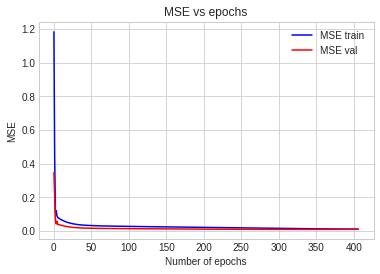

In [11]:
 show_curves(history)

7/7 [==============================] - 0s 1ms/step - loss: 0.0175 - mean_squared_error: 0.0175
Test MSE 0.0175


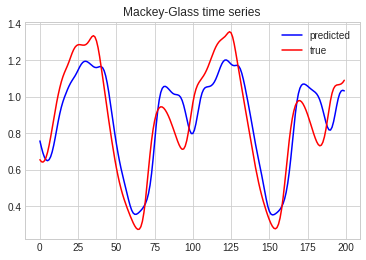

In [12]:
results = model.evaluate(inputs_evaluation, targets_evaluation)
print(f"Test MSE {results[1] :.4f}")
pred_target_evaluation = model.predict(inputs_evaluation)
plt.plot(pred_target_evaluation, color="b", label="predicted")
plt.plot(targets_evaluation, color="r", label="true")
plt.title("Mackey-Glass time series")
plt.legend(loc="upper right")
plt.show()

Noise

In [26]:
inputs_noisy_training, targets_noisy_training, \
    inputs_noisy_testing, targets_noisy_testing, \
    inputs_noisy_evaluation, targets_noisy_evaluation = \
        data_split(training_size=700, inputs=inputs_noisy, targets=targets_noisy)

input_dim = inputs_noisy_training.shape[1]
hidden_layer_1_dim = 5
hidden_layer_2_dim = 3
learning_rate = 10e-3
batch_size = 100
epochs = 10000

print(inputs_noisy_training.shape)


 Training samples: 700 
 Testing samples: 300 
 Evaluation samples: 200
(700, 5)


In [27]:
uncompiled_model = get_uncomplied_model(input_dim, hidden_layer_1_dim, hidden_layer_2_dim)
model = get_compiled_model(uncompiled_model, learning_rate)

model_saver = ModelCheckpoint(os.path.join("saved_models", "save_at_{epoch}.h5"), period=100)
early_stopper = tf.keras.callbacks.EarlyStopping(monitor='val_mean_squared_error', 
                                                 min_delta=10e-6, 
                                                 restore_best_weights=True, 
                                                 patience=200)
callbacks = [model_saver, early_stopper]

history_noisy = model.fit(inputs_noisy_training, targets_noisy_training,
                    epochs=epochs, 
                    batch_size=batch_size, 
                    verbose=1, 
                    validation_data=(inputs_noisy_testing, targets_noisy_testing), 
                    shuffle=False,
                    callbacks=callbacks)

Epoch 1/10000
7/7 [==============================] - 1s 27ms/step - loss: 2.0985 - mean_squared_error: 2.0985 - val_loss: 1.2403 - val_mean_squared_error: 1.2403
Epoch 2/10000
7/7 [==============================] - 0s 6ms/step - loss: 1.0723 - mean_squared_error: 1.0723 - val_loss: 1.0878 - val_mean_squared_error: 1.0878
Epoch 3/10000
7/7 [==============================] - 0s 7ms/step - loss: 1.1342 - mean_squared_error: 1.1342 - val_loss: 1.1067 - val_mean_squared_error: 1.1067
Epoch 4/10000
7/7 [==============================] - 0s 6ms/step - loss: 1.1089 - mean_squared_error: 1.1089 - val_loss: 1.0379 - val_mean_squared_error: 1.0379
Epoch 5/10000
7/7 [==============================] - 0s 6ms/step - loss: 1.0296 - mean_squared_error: 1.0296 - val_loss: 1.0494 - val_mean_squared_error: 1.0494
Epoch 6/10000
7/7 [==============================] - 0s 6ms/step - loss: 1.0226 - mean_squared_error: 1.0226 - val_loss: 1.0466 - val_mean_squared_error: 1.0466
Epoch 7/10000
7/7 [==============

Epoch 51/10000
7/7 [==============================] - 0s 8ms/step - loss: 1.0198 - mean_squared_error: 1.0198 - val_loss: 1.0365 - val_mean_squared_error: 1.0365
Epoch 52/10000
7/7 [==============================] - 0s 7ms/step - loss: 1.0198 - mean_squared_error: 1.0198 - val_loss: 1.0365 - val_mean_squared_error: 1.0365
Epoch 53/10000
7/7 [==============================] - 0s 7ms/step - loss: 1.0197 - mean_squared_error: 1.0197 - val_loss: 1.0364 - val_mean_squared_error: 1.0364
Epoch 54/10000
7/7 [==============================] - 0s 6ms/step - loss: 1.0196 - mean_squared_error: 1.0196 - val_loss: 1.0364 - val_mean_squared_error: 1.0364
Epoch 55/10000
7/7 [==============================] - 0s 6ms/step - loss: 1.0196 - mean_squared_error: 1.0196 - val_loss: 1.0364 - val_mean_squared_error: 1.0364
Epoch 56/10000
7/7 [==============================] - 0s 7ms/step - loss: 1.0195 - mean_squared_error: 1.0195 - val_loss: 1.0363 - val_mean_squared_error: 1.0363
Epoch 57/10000
7/7 [========

7/7 [==============================] - 0s 6ms/step - loss: 1.0149 - mean_squared_error: 1.0149 - val_loss: 1.0340 - val_mean_squared_error: 1.0340
Epoch 102/10000
7/7 [==============================] - 0s 6ms/step - loss: 1.0147 - mean_squared_error: 1.0147 - val_loss: 1.0340 - val_mean_squared_error: 1.0340
Epoch 103/10000
7/7 [==============================] - 0s 6ms/step - loss: 1.0146 - mean_squared_error: 1.0146 - val_loss: 1.0339 - val_mean_squared_error: 1.0339
Epoch 104/10000
7/7 [==============================] - 0s 6ms/step - loss: 1.0144 - mean_squared_error: 1.0144 - val_loss: 1.0338 - val_mean_squared_error: 1.0338
Epoch 105/10000
7/7 [==============================] - 0s 6ms/step - loss: 1.0142 - mean_squared_error: 1.0142 - val_loss: 1.0337 - val_mean_squared_error: 1.0337
Epoch 106/10000
7/7 [==============================] - 0s 6ms/step - loss: 1.0140 - mean_squared_error: 1.0140 - val_loss: 1.0336 - val_mean_squared_error: 1.0336
Epoch 107/10000
7/7 [=================

7/7 [==============================] - 0s 6ms/step - loss: 0.9956 - mean_squared_error: 0.9956 - val_loss: 1.0249 - val_mean_squared_error: 1.0249
Epoch 152/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.9949 - mean_squared_error: 0.9949 - val_loss: 1.0246 - val_mean_squared_error: 1.0246
Epoch 153/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.9941 - mean_squared_error: 0.9941 - val_loss: 1.0242 - val_mean_squared_error: 1.0242
Epoch 154/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.9933 - mean_squared_error: 0.9933 - val_loss: 1.0239 - val_mean_squared_error: 1.0239
Epoch 155/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.9925 - mean_squared_error: 0.9925 - val_loss: 1.0235 - val_mean_squared_error: 1.0235
Epoch 156/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.9917 - mean_squared_error: 0.9917 - val_loss: 1.0231 - val_mean_squared_error: 1.0231
Epoch 157/10000
7/7 [=================

7/7 [==============================] - 0s 6ms/step - loss: 0.9622 - mean_squared_error: 0.9622 - val_loss: 1.0116 - val_mean_squared_error: 1.0116
Epoch 202/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.9619 - mean_squared_error: 0.9619 - val_loss: 1.0115 - val_mean_squared_error: 1.0115
Epoch 203/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.9616 - mean_squared_error: 0.9616 - val_loss: 1.0115 - val_mean_squared_error: 1.0115
Epoch 204/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.9613 - mean_squared_error: 0.9613 - val_loss: 1.0114 - val_mean_squared_error: 1.0114
Epoch 205/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.9611 - mean_squared_error: 0.9611 - val_loss: 1.0114 - val_mean_squared_error: 1.0114
Epoch 206/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.9608 - mean_squared_error: 0.9608 - val_loss: 1.0114 - val_mean_squared_error: 1.0114
Epoch 207/10000
7/7 [=================

7/7 [==============================] - 0s 7ms/step - loss: 0.9564 - mean_squared_error: 0.9564 - val_loss: 1.0123 - val_mean_squared_error: 1.0123
Epoch 252/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.9563 - mean_squared_error: 0.9563 - val_loss: 1.0123 - val_mean_squared_error: 1.0123
Epoch 253/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.9563 - mean_squared_error: 0.9563 - val_loss: 1.0123 - val_mean_squared_error: 1.0123
Epoch 254/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.9563 - mean_squared_error: 0.9563 - val_loss: 1.0124 - val_mean_squared_error: 1.0124
Epoch 255/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.9562 - mean_squared_error: 0.9562 - val_loss: 1.0124 - val_mean_squared_error: 1.0124
Epoch 256/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.9562 - mean_squared_error: 0.9562 - val_loss: 1.0124 - val_mean_squared_error: 1.0124
Epoch 257/10000
7/7 [=================

7/7 [==============================] - 0s 7ms/step - loss: 0.9550 - mean_squared_error: 0.9550 - val_loss: 1.0127 - val_mean_squared_error: 1.0127
Epoch 302/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.9550 - mean_squared_error: 0.9550 - val_loss: 1.0127 - val_mean_squared_error: 1.0127
Epoch 303/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.9550 - mean_squared_error: 0.9550 - val_loss: 1.0127 - val_mean_squared_error: 1.0127
Epoch 304/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.9549 - mean_squared_error: 0.9549 - val_loss: 1.0127 - val_mean_squared_error: 1.0127
Epoch 305/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.9549 - mean_squared_error: 0.9549 - val_loss: 1.0127 - val_mean_squared_error: 1.0127
Epoch 306/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.9549 - mean_squared_error: 0.9549 - val_loss: 1.0127 - val_mean_squared_error: 1.0127
Epoch 307/10000
7/7 [=================

7/7 [==============================] - 0s 7ms/step - loss: 0.9538 - mean_squared_error: 0.9538 - val_loss: 1.0125 - val_mean_squared_error: 1.0124
Epoch 352/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.9537 - mean_squared_error: 0.9537 - val_loss: 1.0124 - val_mean_squared_error: 1.0124
Epoch 353/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.9537 - mean_squared_error: 0.9537 - val_loss: 1.0124 - val_mean_squared_error: 1.0124
Epoch 354/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.9537 - mean_squared_error: 0.9537 - val_loss: 1.0124 - val_mean_squared_error: 1.0124
Epoch 355/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.9537 - mean_squared_error: 0.9537 - val_loss: 1.0124 - val_mean_squared_error: 1.0124
Epoch 356/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.9536 - mean_squared_error: 0.9536 - val_loss: 1.0124 - val_mean_squared_error: 1.0124
Epoch 357/10000
7/7 [=================

7/7 [==============================] - 0s 7ms/step - loss: 0.9525 - mean_squared_error: 0.9525 - val_loss: 1.0119 - val_mean_squared_error: 1.0119
Epoch 402/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.9525 - mean_squared_error: 0.9525 - val_loss: 1.0119 - val_mean_squared_error: 1.0119
Epoch 403/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.9525 - mean_squared_error: 0.9525 - val_loss: 1.0119 - val_mean_squared_error: 1.0119
Epoch 404/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.9524 - mean_squared_error: 0.9524 - val_loss: 1.0118 - val_mean_squared_error: 1.0118
Epoch 405/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.9524 - mean_squared_error: 0.9524 - val_loss: 1.0118 - val_mean_squared_error: 1.0118
Epoch 406/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.9524 - mean_squared_error: 0.9524 - val_loss: 1.0118 - val_mean_squared_error: 1.0118
Epoch 407/10000
7/7 [=================

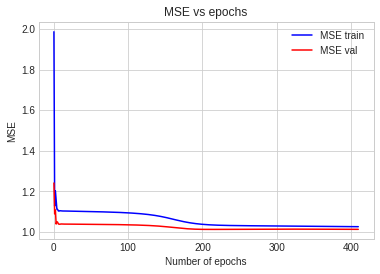

In [28]:
 show_curves(history_noisy)

7/7 [==============================] - 0s 1ms/step - loss: 1.1062 - mean_squared_error: 1.1062
Test MSE 1.1062


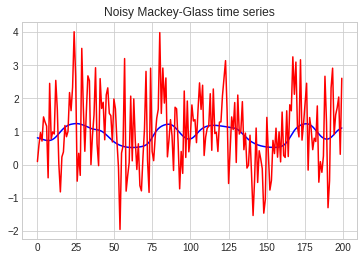

In [29]:
results_noisy = model.evaluate(inputs_noisy_evaluation, targets_noisy_evaluation)
print(f"Test MSE {results_noisy[1] :.4f}")
pred_target_noisy_evaluation = model.predict(inputs_noisy_evaluation)
plt.plot(pred_target_noisy_evaluation, color="b", label="predicted")
plt.plot(targets_noisy_evaluation, color="r", label="true")
plt.title("Noisy Mackey-Glass time series")
plt.show()